## Análise de Dados de Tickets de TI
**Dados fictícios**

Visando otimizar recursos de tecnologia como o tempo, faço aqui uma análise dos dados de tickets de TI. 
Criei um exemplo de um arquivo xlsx, simulando um arquivo de uma plataforma de ticket padrão.
O arquivo tem 51 linhas com 50 tickets simulando demandas do dia 01/06 até 07/06.

**Vejo essa análise necessária para empresas onde tem essa função de suporte de TI.**

Visto que podemos perceber o fluxo de horário que mais tem problema, quais colaboradores tem mais dificuldade com tecnologia, onde focar nossa atenção no ti e fazer uma previsão de como será o restante de dias as demandas de TI. Podendo assim estar mais preparados e diminuir o tempo decorrido até a resolução.

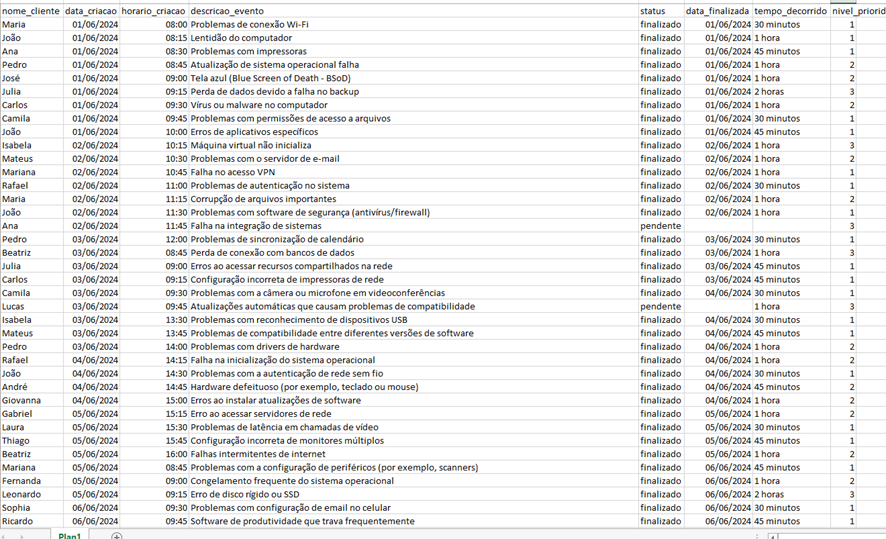

**Escolhi usar python para tal projeto**
Afim de testar minhas hardskill usei python para fazer graficos onde podemos analisar tais conceitos comentado acima.

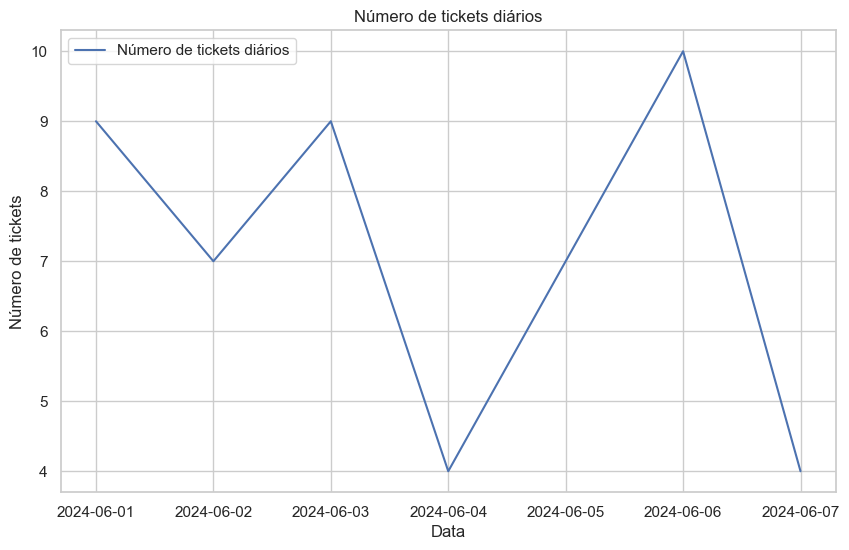

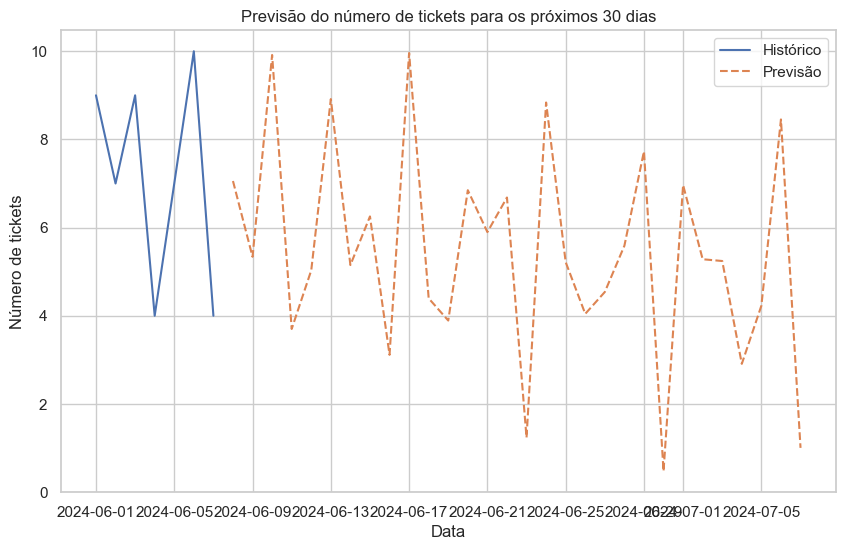

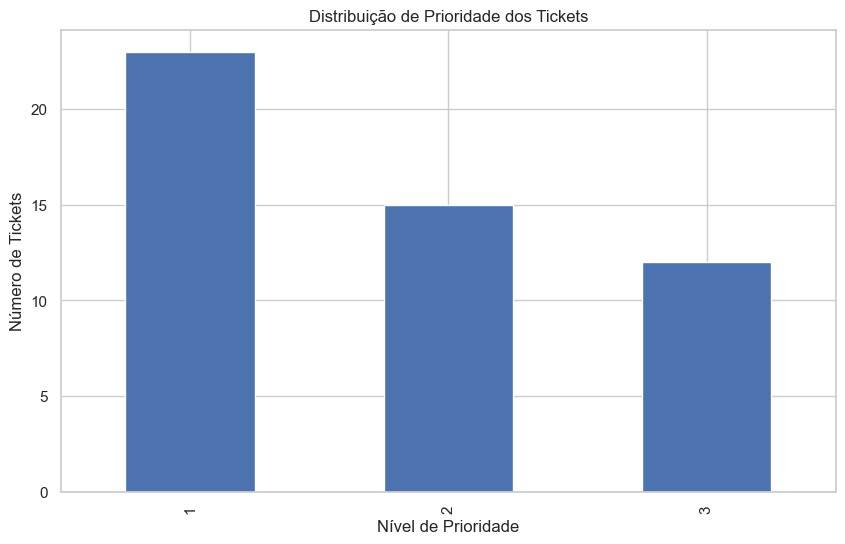

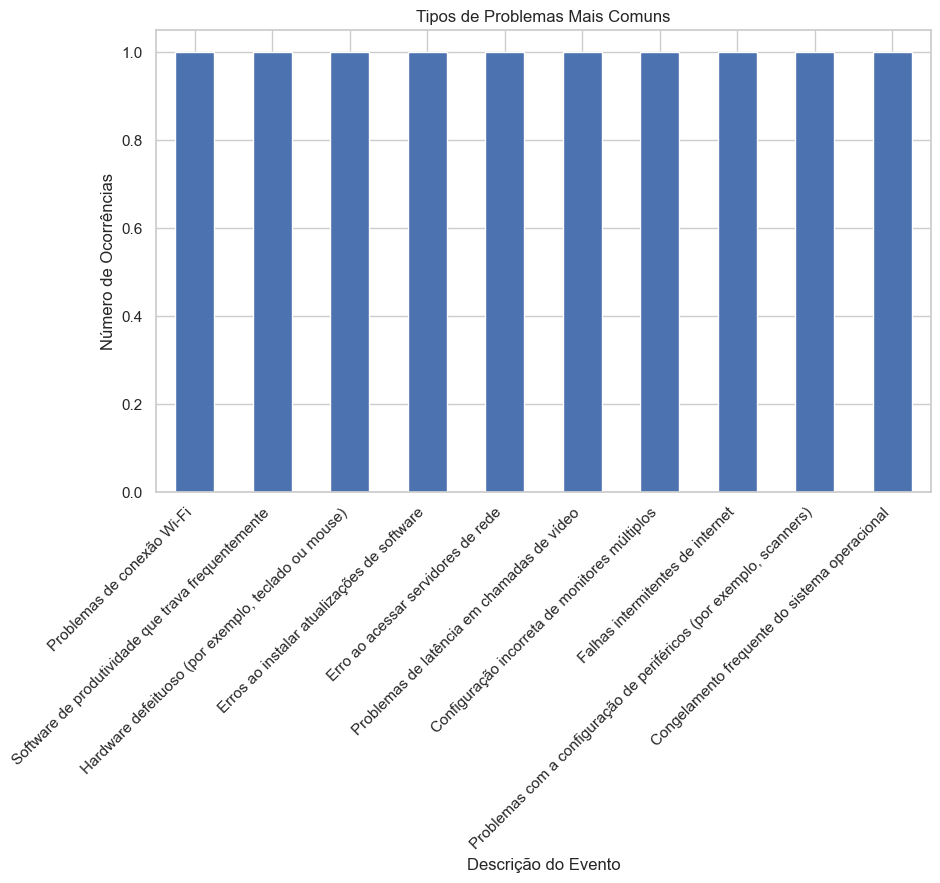

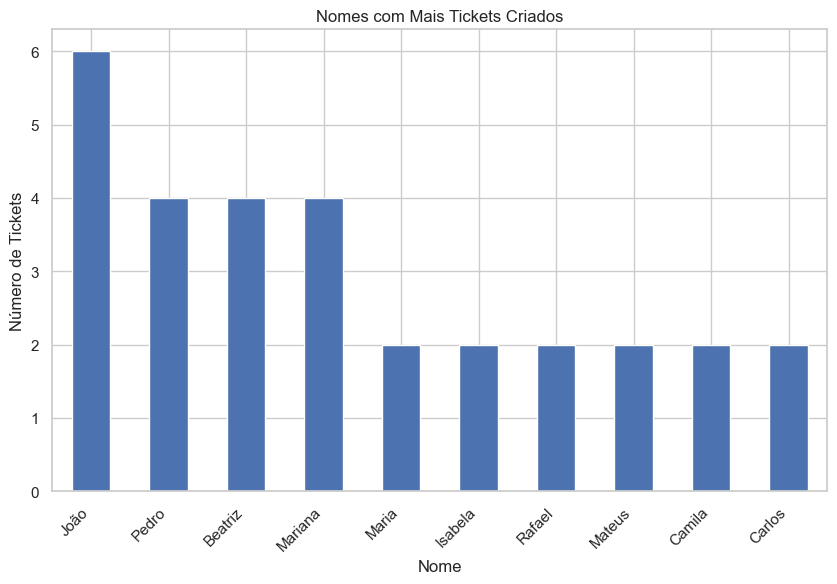

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# ignorar avisos
warnings.filterwarnings("ignore")

# carregar os dados
file_path = 'F://Nova pasta/data set/tickets_ti.xlsx'
data = pd.read_excel(file_path)

# converter data_criacao e horario_criacao para datetime
data['data_hora_criacao'] = pd.to_datetime(data['data_criacao'].astype(str) + ' ' + data['horario_criacao'].astype(str), errors='coerce')

# horário com mais criação de tickets
data['hora_criacao'] = data['data_hora_criacao'].dt.hour
horario_mais_criacao = data['hora_criacao'].mode()[0]

# tempo médio demorado por ticket
data['tempo_decorrido_minutos'] = data['tempo_decorrido'].str.extract(r'(\d+)').astype(float)
data.loc[data['tempo_decorrido'].str.contains('hora', na=False), 'tempo_decorrido_minutos'] *= 60
tempo_medio_ticket = data['tempo_decorrido_minutos'].mean()

# previsão de demandas futuras (utilizando ARIMA)
demandas_diarias = data.set_index('data_hora_criacao').resample('D').size()

# visualizar os dados antes de aplicar ARIMA
plt.figure(figsize=(10, 6))
plt.plot(demandas_diarias, label='Número de tickets diários')
plt.title('Número de tickets diários')
plt.xlabel('Data')
plt.ylabel('Número de tickets')
plt.legend()
plt.show()

# Ajustar o modelo ARIMA
modelo_arima = ARIMA(demandas_diarias, order=(5, 1, 0))
modelo_ajustado = modelo_arima.fit()

# previsão para os próximos 30 dias
previsao = modelo_ajustado.forecast(steps=30)

# previsão 30 dias
plt.figure(figsize=(10, 6))
plt.plot(demandas_diarias, label='Histórico')
plt.plot(previsao, label='Previsão', linestyle='--')
plt.title('Previsão do número de tickets para os próximos 30 dias')
plt.xlabel('Data')
plt.ylabel('Número de tickets')
plt.legend()
plt.show()

distribuicao_prioridade = data['nivel_prioridade'].value_counts()
problemas_comuns = data['descricao_evento'].value_counts().head(10)

# distribuição de prioridade
plt.figure(figsize=(10, 6))
distribuicao_prioridade.plot(kind='bar')
plt.title('Distribuição de Prioridade dos Tickets')
plt.xlabel('Nível de Prioridade')
plt.ylabel('Número de Tickets')
plt.show()

# problemas mais comuns
plt.figure(figsize=(10, 6))
problemas_comuns.plot(kind='bar')
plt.title('Tipos de Problemas Mais Comuns')
plt.xlabel('Descrição do Evento')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.show()

# nomes com tickets mais criados
nomes_mais_tickets = data['nome_cliente'].value_counts().head(10)  

plt.figure(figsize=(10, 6))
nomes_mais_tickets.plot(kind='bar')
plt.title('Nomes com Mais Tickets Criados')
plt.xlabel('Nome')
plt.ylabel('Número de Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()

resultados = {
    'horario_mais_criacao': horario_mais_criacao,
    'tempo_medio_ticket': tempo_medio_ticket,
    'previsao_30_dias': previsao,
    'distribuicao_prioridade': distribuicao_prioridade,
    'problemas_comuns': problemas_comuns,
    'nomes_mais_tickets': nomes_mais_tickets
}





